                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
(550, 7)
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64
['Non Fiction' 'Fiction']


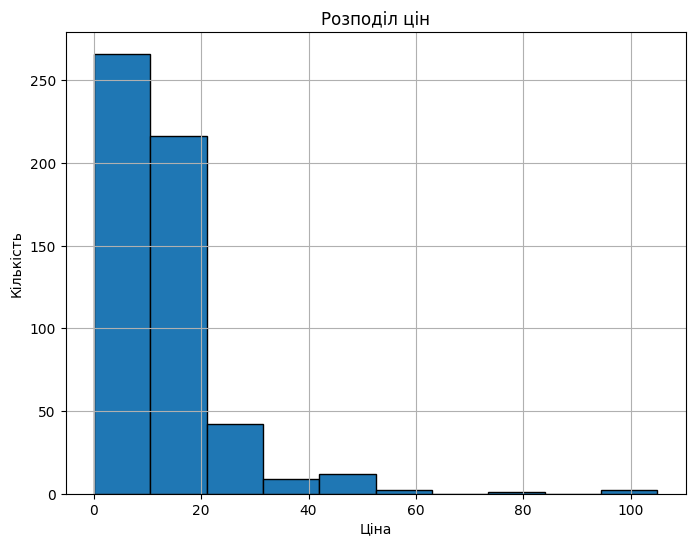

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0
Найвищий рейтинг: 4.9
Кількість книг з найвищим рейтингом (4.9): 52
Книга з найбільшою кількістю відгуків: Where the Crawdads Sing
Найдорожча книга з Топ-50 у 2015 році: Publication Manual of the American Psychological Association, 6th Edition
Кількість книг жанру Fiction у Топ-50 у 2010 році: 16
Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: 1
Остання книга у відсортованому списку: Old School (Diary of a Wimpy Kid #10)
Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction: 0
Максимальна ціна для жанру Non Fiction: 105
Мінімальна ціна для жанру Non Fiction: 0
                         author  name
0              Abraham Verghese     2
1                Adam Gasiewski     1
2                 Adam Mansbach     1
3                     Adir Levy     1
4    Admiral William H. McRaven     1
..                          ...   ...
243             Walter Isaacson     3
244               William

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("bestsellers with categories.csv")

print(df.head())
print(df.shape)

# Про скільки книг зберігає дані датасет?  550 (номерація від 0 до 549)

df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

na_counts = df.isna().sum()
print(na_counts)

# Чи є в якихось змінних пропуски? Ні, немає

unique_genres = df['genre'].unique()
print(unique_genres)

# Які є унікальні жанри? в колонці genre є 'Non Fiction' і 'Fiction'

# Побудова гістограми розподілу цін
df['price'].plot(kind='hist', bins=10, edgecolor='black', figsize=(8, 6))
plt.xlabel('Ціна')
plt.ylabel('Кількість')
plt.title('Розподіл цін')
plt.grid(True)
plt.show()

# Визначення максимальної, мінімальної, середньої та медіанної цін
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f"Максимальна ціна: {max_price}")
print(f"Мінімальна ціна: {min_price}")
print(f"Середня ціна: {mean_price}")
print(f"Медіанна ціна: {median_price}")

# Максимальна ціна? 105
# Мінімальна ціна? 0
# Середня ціна? 13.1
# Медіанна ціна? 11.0

# Який рейтинг у датасеті найвищий?
max_rating = df['user_rating'].max()
print(f"Найвищий рейтинг: {max_rating}")

# Скільки книг мають такий рейтинг?
books_with_max_rating = df[df['user_rating'] == max_rating].shape[0]
print(f"Кількість книг з найвищим рейтингом ({max_rating}): {books_with_max_rating}")

# Яка книга має найбільше відгуків?
book_with_most_reviews = df[df['reviews'] == df['reviews'].max()]['name'].iloc[0]
print(f"Книга з найбільшою кількістю відгуків: {book_with_most_reviews}")

# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?
top_50_2015 = df[(df['year'] == 2015) & (df['user_rating'] >= 4.5)].sort_values(by='price')
most_expensive_2015 = top_50_2015.iloc[-1]['name']
print(f"Найдорожча книга з Топ-50 у 2015 році: {most_expensive_2015}")

# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?
fiction_top_50_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction') & (df['user_rating'] >= 4.5)].shape[0]
print(f"Кількість книг жанру Fiction у Топ-50 у 2010 році: {fiction_top_50_2010}")

# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?
rating_4_9_2010_2011 = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))].shape[0]
print(f"Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: {rating_4_9_2010_2011}")

# Відсортовані за зростанням ціни книги з рейтингом у 2015 році, які коштують дешевше за 8 доларів
sorted_books_2015_under_8 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
last_book_sorted = sorted_books_2015_under_8.iloc[-1]['name']
print(f"Остання книга у відсортованому списку: {last_book_sorted}")

#Який рейтинг у датасеті найвищий? 4.9
#Скільки книг мають такий рейтинг? 52
#Яка книга має найбільше відгуків? Where the Crawdads Sing
#З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Publication Manual of the American Psychological Association, 6th Edition
#Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? 16
#Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? 1
#Яка книга остання у відсортованому списку?  Old School (Diary of a Wimpy Kid #10)


# Групування за жанром і визначення максимальної та мінімальної цін
genre_prices = df.groupby('genre')['price'].agg(['max', 'min'])

# Отримання значень для жанру Fiction
max_price_fiction = genre_prices.loc['Fiction', 'max']
min_price_fiction = genre_prices.loc['Fiction', 'min']

# Отримання значень для жанру Non Fiction
max_price_non_fiction = genre_prices.loc['Non Fiction', 'max']
min_price_non_fiction = genre_prices.loc['Non Fiction', 'min']

print(f"Максимальна ціна для жанру Fiction: {max_price_fiction}")
print(f"Мінімальна ціна для жанру Fiction: {min_price_fiction}")
print(f"Максимальна ціна для жанру Non Fiction: {max_price_non_fiction}")
print(f"Мінімальна ціна для жанру Non Fiction: {min_price_non_fiction}")

#Максимальна ціна для жанру Fiction: 82
#Мінімальна ціна для жанру Fiction: 0
#Максимальна ціна для жанру Non Fiction: 105
#Мінімальна ціна для жанру Non Fiction: 0

# Групування за автором і підрахунок кількості книг для кожного автора
author_books_count = df.groupby('author')['name'].agg('count').reset_index()

# Виведення таблиці
print(author_books_count)

# Визначення розмірності таблиці
table_shape = author_books_count.shape
print(f"Розмірність таблиці: {table_shape}")

# Знаходження автора з найбільшою кількістю книг
max_books_author = author_books_count[author_books_count['name'] == author_books_count['name'].max()]
max_books_author_name = max_books_author.iloc[0]['author']
max_books_count = max_books_author.iloc[0]['name']

print(f"Автор з найбільшою кількістю книг: {max_books_author_name}")
print(f"Кількість книг цього автора: {max_books_count}")

#Якої розмірності вийшла таблиця? 248, 2
#Який автор має найбільше книг? Jeff Kinney
#Скільки книг цього автора? 12

# Групування за автором і підрахунок середнього рейтингу для кожного автора
author_avg_rating = df.groupby('author')['user_rating'].agg('mean').reset_index()

# Виведення таблиці
print(author_avg_rating)

# Знаходження автора з мінімальним середнім рейтингом
min_avg_rating_author = author_avg_rating[author_avg_rating['user_rating'] == author_avg_rating['user_rating'].min()]
min_avg_rating_author_name = min_avg_rating_author.iloc[0]['author']
min_avg_rating = min_avg_rating_author.iloc[0]['user_rating']

print(f"Автор з мінімальним середнім рейтингом: {min_avg_rating_author_name}")
print(f"Середній рейтинг цього автора: {min_avg_rating}")

# У якого автора середній рейтинг мінімальний? Donna Tartt
# Який у цього автора середній рейтинг? 3.9

# Об'єднання двох датафреймів за стовпцями
combined_df = pd.concat([author_books_count, author_avg_rating['user_rating']], axis=1)

# Перейменування стовпців у об'єднаному датафреймі
combined_df.columns = ['author', 'books_count', 'avg_rating']

# Сортування за зростанням кількості книг та зростанням середнього рейтингу
sorted_df = combined_df.sort_values(by=['books_count', 'avg_rating'], ascending=[True, True])

# Виведення першого автора у відсортованому списку
first_author = sorted_df.iloc[0]['author']
print(f"Перший автор у списку: {first_author}")

# Який автор перший у списку? Muriel Barbery